## Siddhardha - CS20B1063

Implement the linear regression model from scratch using gradient descent.
- Start with initializing the parameters m (slope) and c (y *intercept) to zero.
- Define the loss function as Mean Squared Error (MSE).
- Calculate the gradients of the loss function with respect to m and c.
- Update the parameters m and c using the gradients and a learning rate.
- Iterate the above steps for a fixed number of iterations or until convergence.
- Plot the cost function over iterations and observe if it is decreasing.
- After the model is trained, predict the output for a given input and compare it with the actual output.

In [138]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Libraries imported successfully")

Libraries imported successfully


In [139]:
df = pd.read_csv("data.csv")
df.columns = ["x", "y"]

df.head()

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


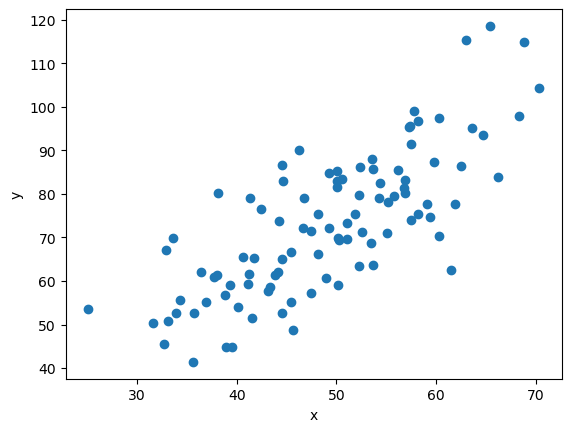

In [140]:
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")

plt.show()

Iteration: 0, mse: 27497519.736839622, m: 3.7121676427213317, c: 0.07314947524787876


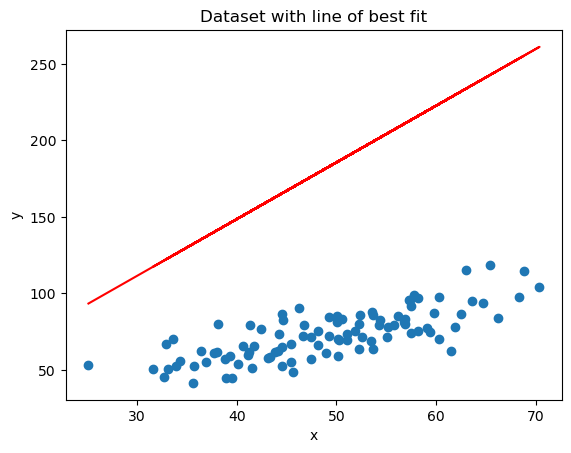

Iteration: 100, mse: 1.0459979112811027e+43, m: 1.3898881866835932e+18, c: 2.7252033631347696e+16


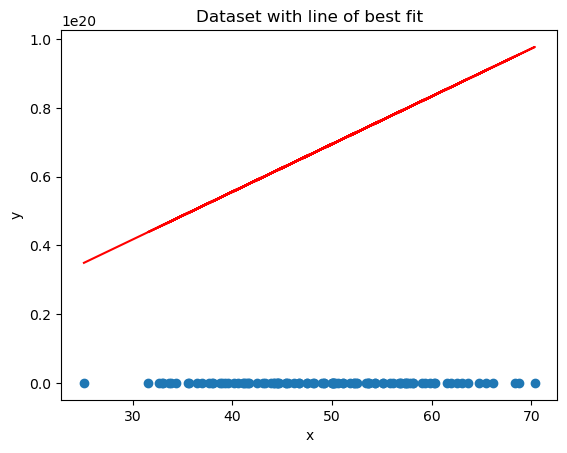

Iteration: 200, mse: 4.059293381412197e+78, m: 8.658440469639714e+35, c: 1.6976913188726888e+34


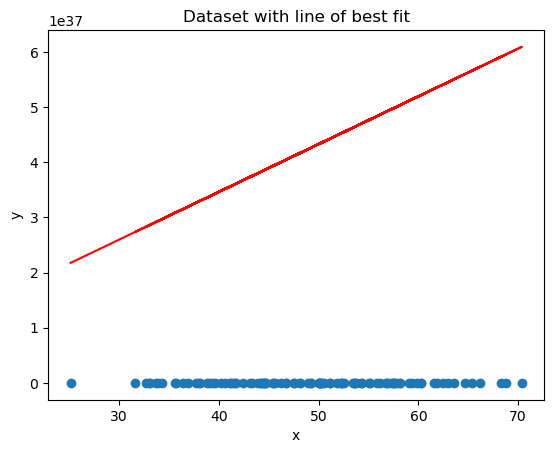

Iteration: 300, mse: 1.5753246329330805e+114, m: 5.3938577278778696e+53, c: 1.0575929316556978e+52


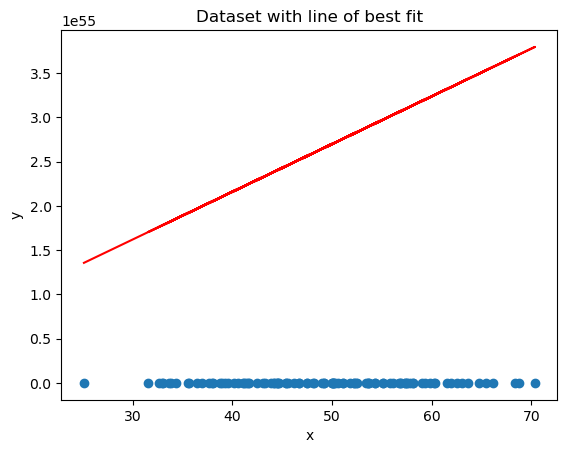

Iteration: 400, mse: 6.11349677382134e+149, m: 3.3601549020985083e+71, c: 6.5883756172518954e+69


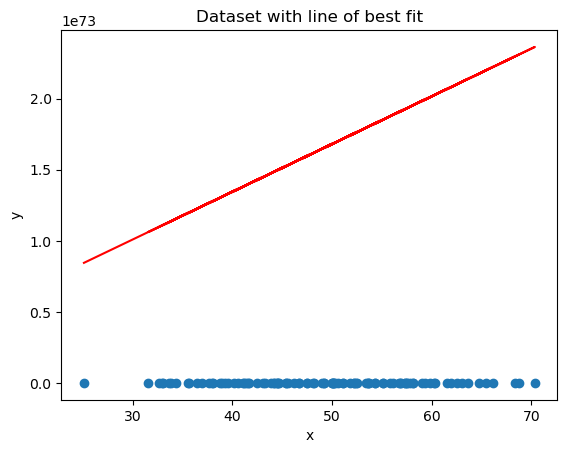

Iteration: 500, mse: 2.3725168782472248e+185, m: 2.0932404107993953e+89, c: 4.104291166738827e+87


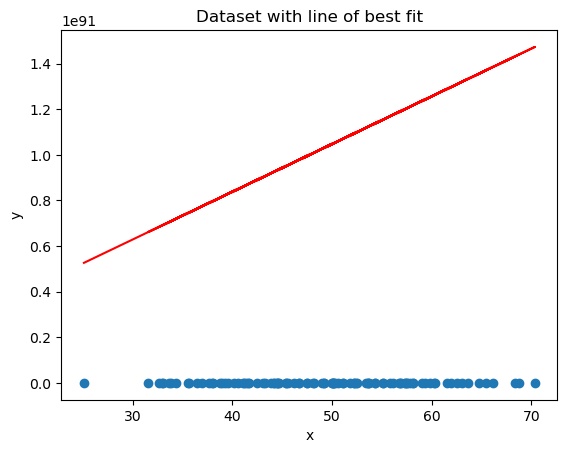

Iteration: 600, mse: 9.20722876909217e+220, m: 1.3040039953715162e+107, c: 2.5568071646159156e+105


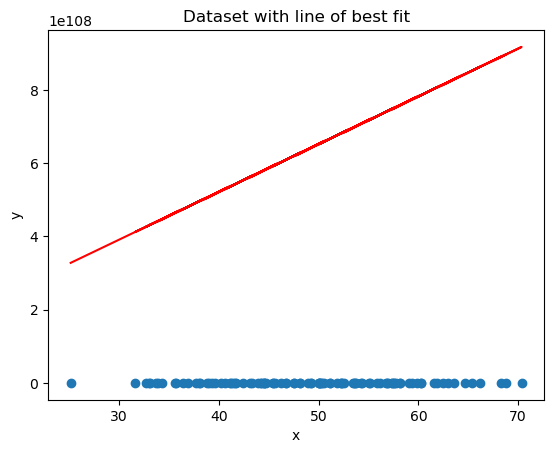

Iteration: 700, mse: 3.573127861961835e+256, m: 8.12341674263537e+124, c: 1.592787307589002e+123


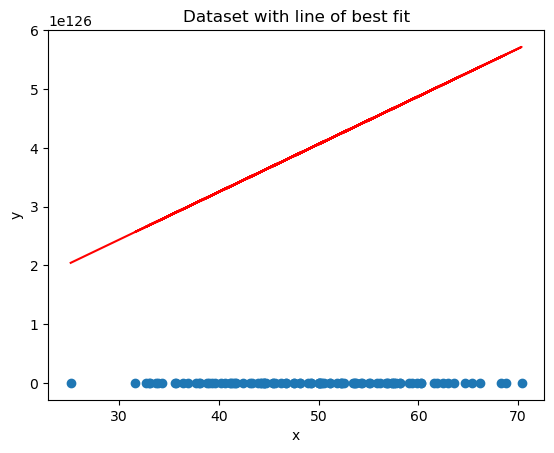

Iteration: 800, mse: 1.3866542298575742e+292, m: 5.060559615519287e+142, c: 9.922419814549218e+140


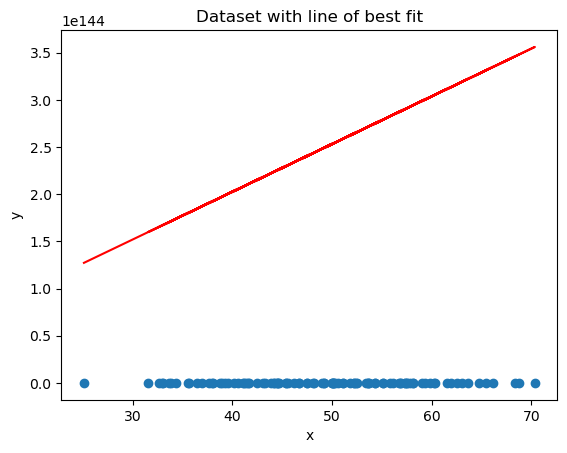

OverflowError: (34, 'Result too large')

In [141]:
costs = []
x = df['x']
y = df['y']

def gradient_descent(x, y, m, c, learning_rate, iterations):
    n = len(x)

    for i in range(iterations):
        y_pred = m * x + c
        mse = (1 / 2 * n) * sum([val**2 for val in (y - y_pred)])
        m_gradient = -(1 / n) * sum(x * (y - y_pred))
        c_gradient = -(1 / n) * sum(y - y_pred)
        m = m - learning_rate * m_gradient
        c = c - learning_rate * c_gradient
        if i % 100 == 0:
            print(f"Iteration: {i}, mse: {mse}, m: {m}, c: {c}")
            plt.scatter(df["x"], df["y"])
            plt.plot(df["x"], m * df["x"] + c, color="red")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Dataset with line of best fit")
            plt.show()
            costs.append(mse)
    return m, c

# set the initial parameters and call the gradient descent function
m = 0
c = 0

learning_rate = 0.001
iterations = 1000

m, c = gradient_descent(x,y, m, c, learning_rate, iterations)

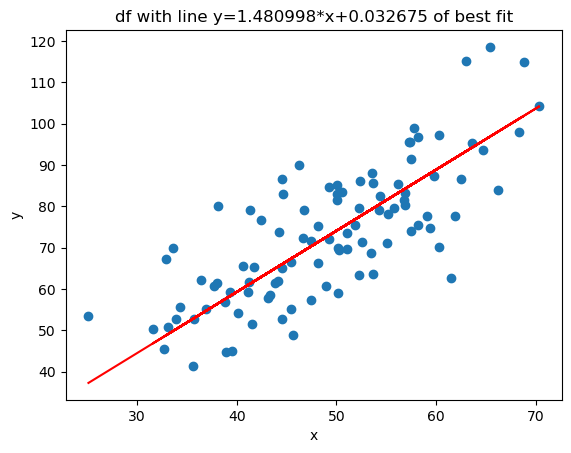

In [ ]:
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], m * df["x"] + c, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"df with line y={m:2f}*x+{c:2f} of best fit")
plt.show()

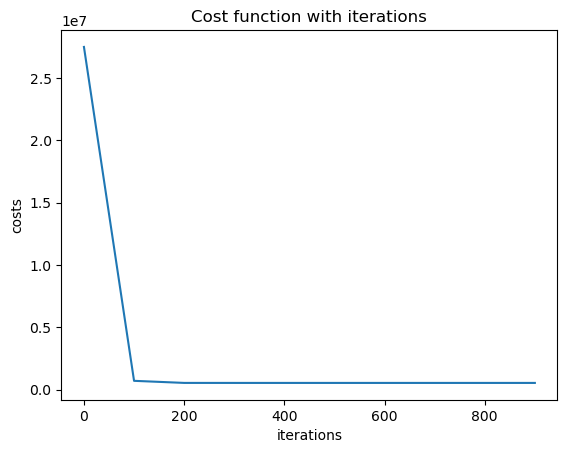

In [ ]:
iterations = []
for i in range(len(costs)):
    iterations.append(i*100)
    
plt.plot(iterations, costs)
plt.xlabel("iterations")
plt.ylabel("costs")
plt.title("Cost function with iterations")
plt.show()

In [ ]:
# Predict output with the given input and compare with the given input

y_pred = m * df["x"] + c

test = pd.DataFrame({"Actual": df["y"], "Predicted": y_pred})

test.head()

,Actual,Predicted
0,68.777596,79.157680
1,62.562382,91.159029
2,71.546632,70.344015
3,87.230925,88.615933
4,78.211518,81.698161


In [ ]:
print(f"MSE: {(1 / 2 * df.shape[0]) * sum([val**2 for val in (y - y_pred)])}")

ValueError: Data must be 1-dimensional